## Part 1: Embedding a periodic signal into a state space where each point carries enough information to advance in time

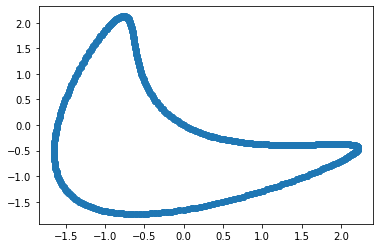

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

data = np.genfromtxt("takens_1.txt", dtype='double')
plt.plot(data[:,0], data[:,1], 'o');

## First coordinate dependent on time

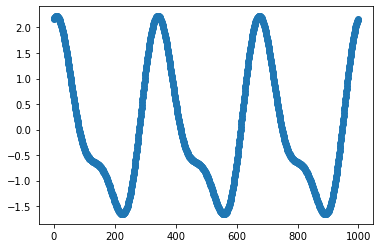

In [3]:
time = np.arange(data.shape[0])
plt.plot(time, data[:,0],  'o');

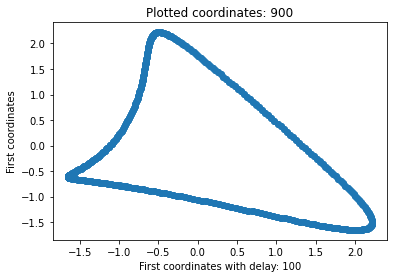

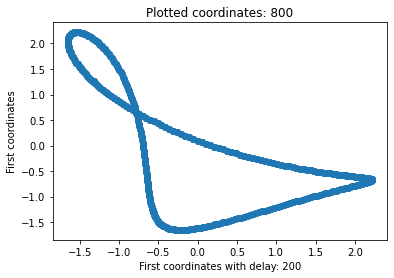

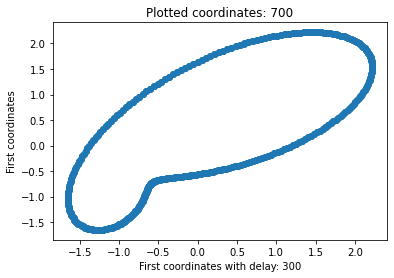

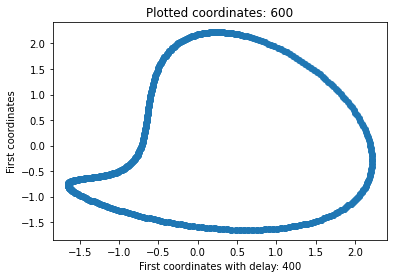

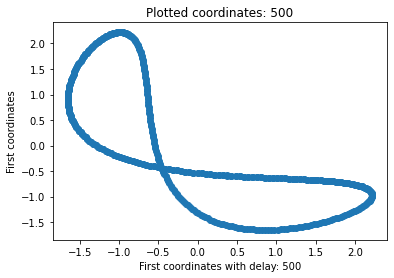

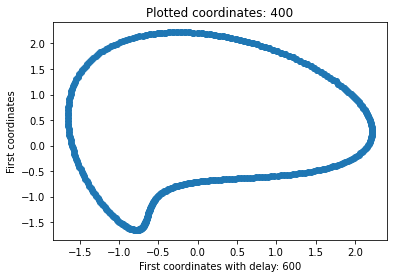

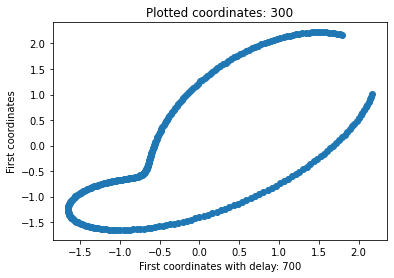

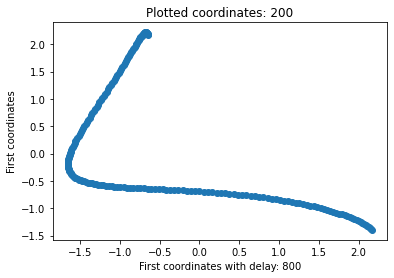

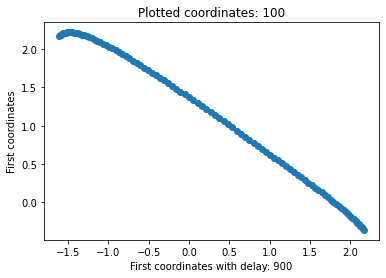

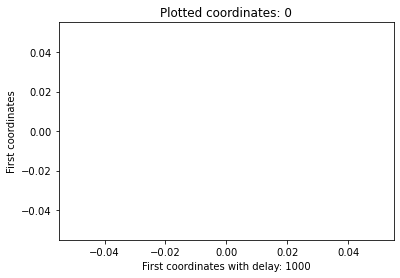

In [3]:
interval = 100
for i in range(data.shape[0] // interval):
    delta_t = interval * (i + 1)
    plt.title(f"Plotted coordinates: {data.shape[0] - delta_t}")
    plt.xlabel(f"First coordinates with delay: {delta_t}")
    plt.ylabel(f"First coordinates")
    plt.plot(data[delta_t:,0], data[:data.shape[0] - delta_t,0], 'o');
    plt.show()

## Part 2: Approximating Lorenz attractor from a single time series.

Text(0.5, 0, 'Z')

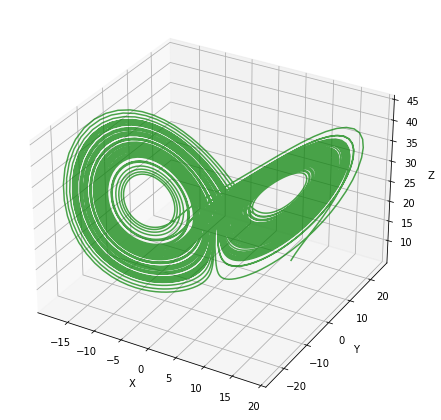

In [4]:
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
    global rho, sigma, beta
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

def lorenz(r = 28.0, 
           s = 10.0, 
           b = 8.0 / 3.0, 
           state0 = [10.0, 10.0, 10.0],
           t = np.arange(0.0, 1000, 0.01)):

    global rho, sigma, beta, simulations
    
    rho = r
    sigma = s
    beta = b
    
    states = odeint(f, state0, t)    
    return states

states = lorenz(t = np.arange(0.0, 100, 0.01))

fig = plt.figure(figsize=(16, 8))
ax0 = fig.add_subplot(1, 2, 1, projection='3d')
ax0.plot(states[:, 0], states[:, 1], states[:, 2], color="g", alpha=0.7)
ax0.set_xlabel('X')
ax0.set_ylabel('Y')
ax0.set_zlabel('Z')

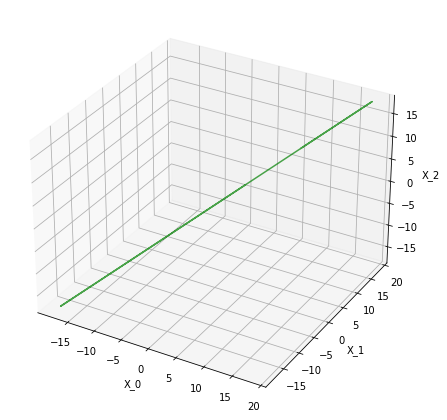

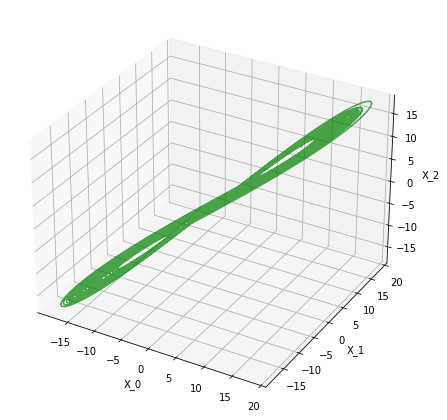

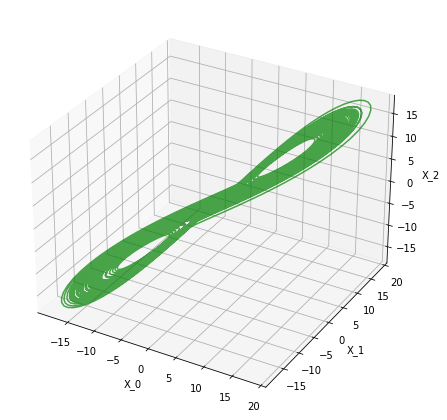

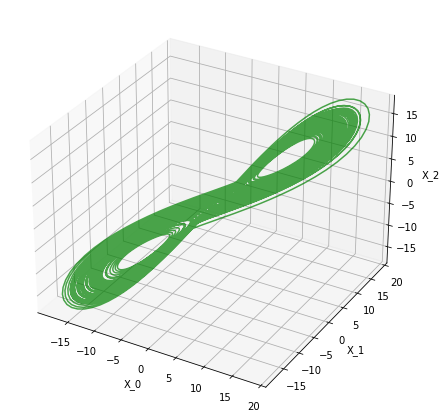

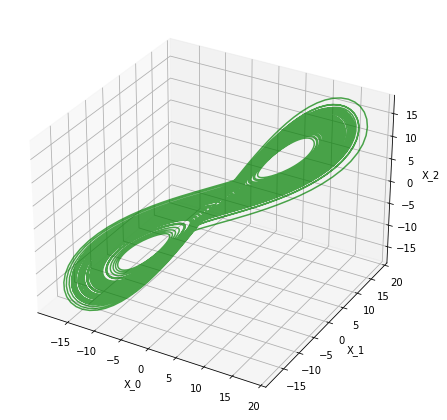

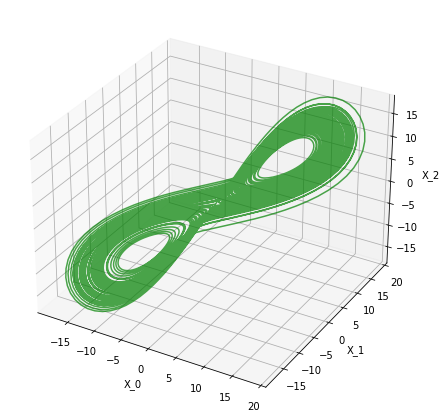

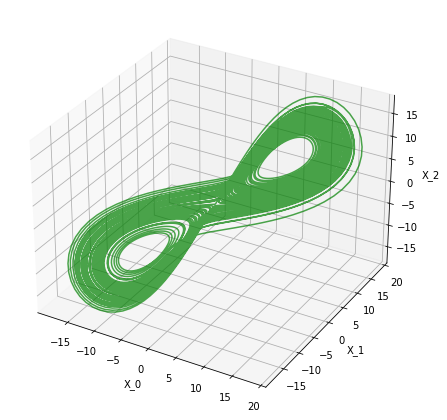

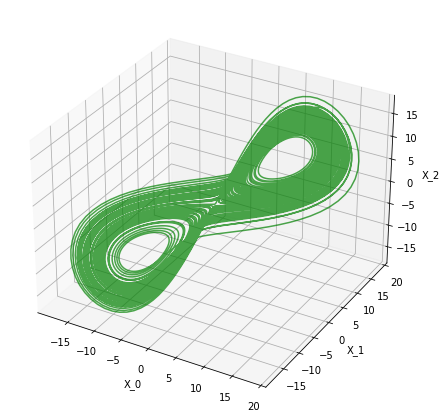

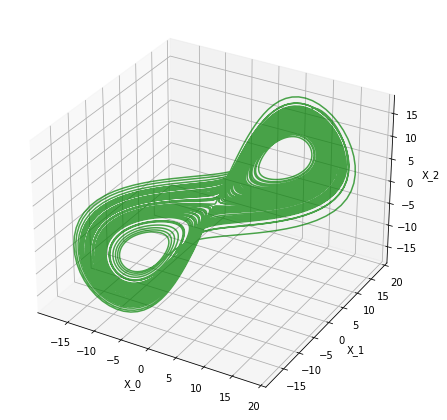

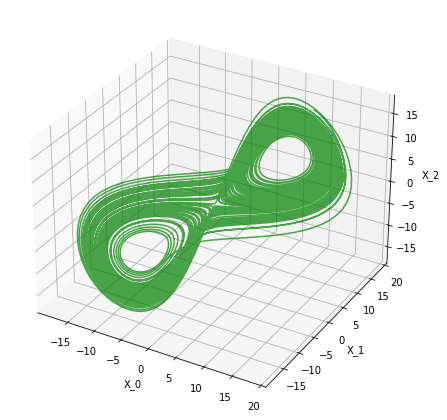

In [6]:
## Measure by x coordinate
for i in range(10):
    delta_t = 1 * i
    fig = plt.figure(figsize=(16, 8))
    ax0 = fig.add_subplot(1, 2, 1, projection='3d')
    ax0.plot(states[:10000 - delta_t*2, 0], states[delta_t:10000-delta_t, 0], states[delta_t*2:, 0], color="g", alpha=0.7)
    ax0.set_xlabel('X_0')
    ax0.set_ylabel('X_1')
    ax0.set_zlabel('X_2')

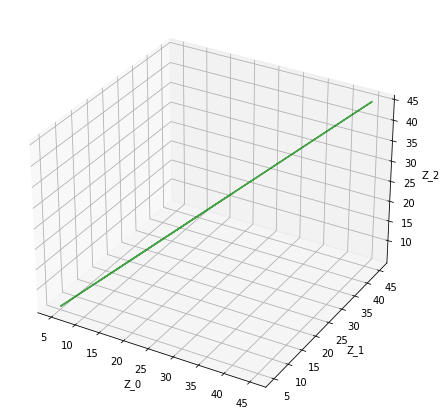

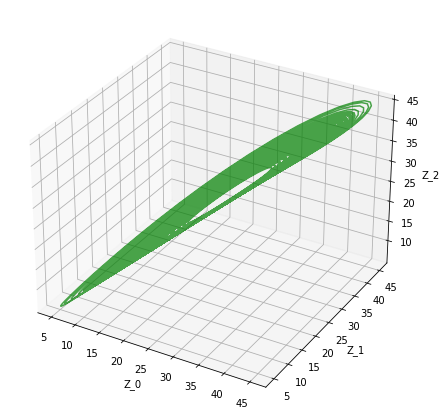

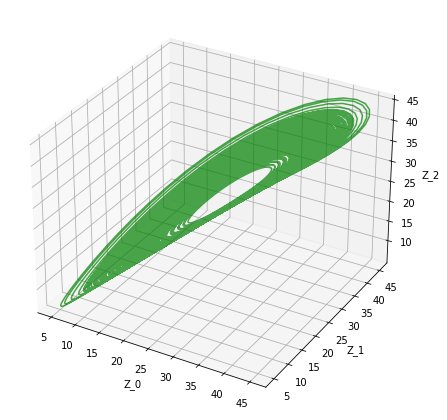

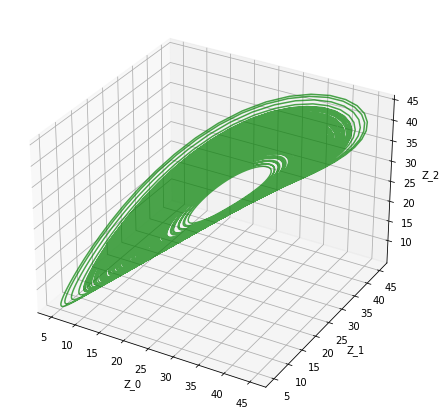

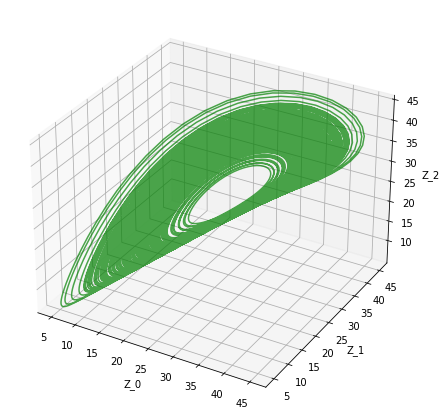

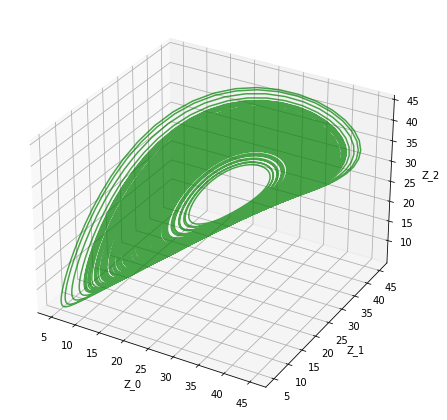

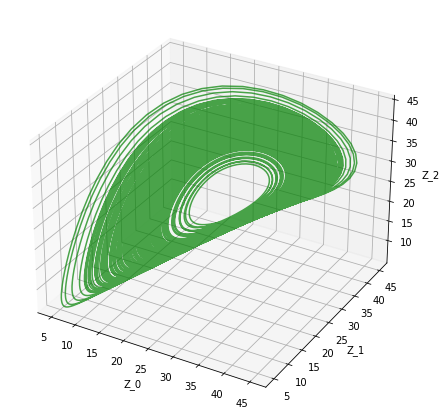

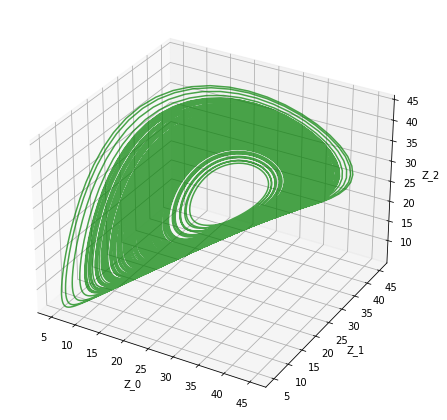

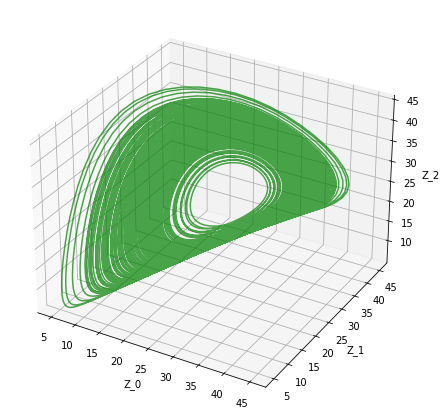

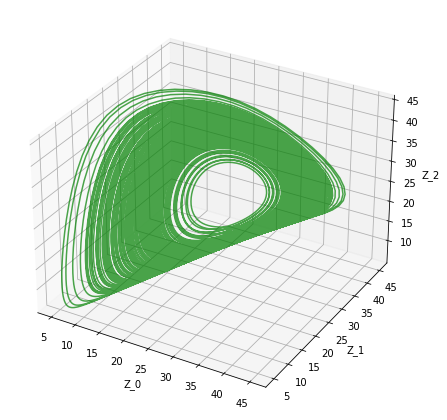

In [7]:
## Measure by z coordinate
for i in range(10):
    delta_t = 1 * i
    fig = plt.figure(figsize=(16, 8))
    ax0 = fig.add_subplot(1, 2, 1, projection='3d')
    ax0.plot(states[:10000 - delta_t*2, 2], states[delta_t:10000-delta_t, 2], states[delta_t*2:, 2], color="g", alpha=0.7)
    ax0.set_xlabel('Z_0')
    ax0.set_ylabel('Z_1')
    ax0.set_zlabel('Z_2')